In [1]:
# utilities
import re
import numpy as np
import pandas as pd
# plotting
import seaborn as sns
import matplotlib.pyplot as plt
# nltk
from nltk.stem import WordNetLemmatizer
# sklearn
from sklearn.svm import LinearSVC
from sklearn.naive_bayes import BernoulliNB
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import confusion_matrix, classification_report

In [2]:
from bs4 import BeautifulSoup
import pandas as pd

In [3]:
import os
# Folder Path
path = r"D:\MACHINE LEARNING\Mentorship program\NLP Projects\NLP_Project_second\job_postings"

In [4]:
# # Change the directory
# os.chdir(path)
# file_list=os.listdir()
# # file_list.remove('desktop.ini')

# # Read text File 
# def read_html_file(file_path):
#     with open(file_path, encoding='utf8') as f:
#         S = BeautifulSoup(f.read(), 'lxml')
#         print(S.prettify())
# #         print(S)
# #         print(S('title'))
# #         print(S.body.prettify())

# # iterate through all file
# counter=0
# for file in file_list:
#     print(file)
#     counter=counter+1
#     # Check whether file is in text format or not
#     if file.endswith(".html"):
#         file_path = f"{path}\{file}"
  
#         # call read text file function
#         read_html_file(file_path)
# print(counter)

In [5]:
lst=[]
lst1=[]

os.chdir(path)
file_list=os.listdir()

def read_html_file(file_path):
    with open(file_path, encoding='utf8') as f:
        S = BeautifulSoup(f.read(), 'html')
        lst.append(S.find_all('li'))
        lst1.append(S.find('title').contents)
    

# iterate through all file
counter=0
for file in file_list:
#     print(file)
    counter=counter+1
    if file.endswith(".html"):
        file_path = f"{path}\{file}"
        read_html_file(file_path)
print(counter)

1459


In [6]:
# lst1=[]

# os.chdir(path)
# file_list=os.listdir()

# def read_html_file(file_path):
#     with open(file_path, encoding='utf8') as f:
#         S = BeautifulSoup(f.read(), 'lxml')
#         lst1.append(S.find('title').contents)

# # iterate through all file
# counter=0
# for file in file_list:
# #     print(file)
#     counter=counter+1
#     if file.endswith(".html"):
#         file_path = f"{path}\{file}"
#         read_html_file(file_path)
# print(counter)

In [7]:
data1 = list(zip(file_list,lst1,lst))
df1 = pd.DataFrame(data1, columns = ['file_name','job_title','job_skills'])
df1
# with pd.option_context('display.max_colwidth', None):
#   display(df1['job_skills'][0])

file_name  \
0     001b92395ed0fb62.html   
1     00321a48d04fe754.html   
2     0079c11b2611349f.html   
3     007d9d7b5c09d820.html   
4     00bf37ae19c7dfd7.html   
...                     ...   
1453  fe385aa11883568f.html   
1454  fee42538d4a7bb9a.html   
1455  fefb9642ac28b85e.html   
1456  ff0eb6d0b4da2289.html   
1457  ff81a90403a3f37e.html   

                                              job_title  \
0                    [Data Scientist - Beavercreek, OH]   
1                  [Data Scientist - Seattle, WA 98101]   
2                         [Data Scientist - Newark, CA]   
3     [Patient Care Assistant / PCA - Med/Surg (Faye...   
4                [Data Manager / Analyst - Oakland, CA]   
...                                                 ...   
1453                  [Data Scientist - Glen Mills, PA]   
1454            [Data Analyst (Part-Time) - Austin, TX]   
1455  [Manager - Business Development (Central and E...   
1456  [Natural Language Processing Undergraduate Int...   
1457   [Political Staffer - San Francisco Bay Area, CA]   

                                             job_skills  
0     [[Use statistical research methods to analyze ...  
1     [[Interface with our internal engagement teams...  
2     [[ Design, develop, document and maintain mach...  
3     [[Provides all personal care services in accor...  
4     [[You possess excellent communication and rela...  
...                                                 ...  
1453  [[Use machine learning methods (e.g., cluster ...  
1454  [[Performing ad-hoc statistical analysis (line...  
1455  [[[Drive New Sales from prospective clients wi...  
1456  [[Design and implement experiments to test new...  
1457  [[relevant: 1 year (Preferred)], [Bonuses], [O...  

[1458 rows x 3 columns]

In [8]:
lst2=[]
for i in range(len(df1)):
    strng = df1['job_title'][i][0].rpartition(' - ')
    lst2.append(strng[0]) 

In [9]:
df1['job_title']=lst2

In [10]:
df1.head()

file_name                                          job_title  \
0  001b92395ed0fb62.html                                     Data Scientist   
1  00321a48d04fe754.html                                     Data Scientist   
2  0079c11b2611349f.html                                     Data Scientist   
3  007d9d7b5c09d820.html  Patient Care Assistant / PCA - Med/Surg (Fayet...   
4  00bf37ae19c7dfd7.html                             Data Manager / Analyst   

                                          job_skills  
0  [[Use statistical research methods to analyze ...  
1  [[Interface with our internal engagement teams...  
2  [[ Design, develop, document and maintain mach...  
3  [[Provides all personal care services in accor...  
4  [[You possess excellent communication and rela...

In [11]:
# with pd.option_context('display.max_colwidth', None):
#   display(df1)

In [12]:
lst3={}
for i in range(len(df1)):
    lst3[i]=[]
    for j in range(len(df1['job_skills'][i])):
        strng = df1['job_skills'][i][j].text.lower()
        lst3[i].append(strng)         

In [13]:
len(lst3)

1458

In [14]:
df1['job_skills2']=lst3.values()

In [15]:
df1.head()

file_name                                          job_title  \
0  001b92395ed0fb62.html                                     Data Scientist   
1  00321a48d04fe754.html                                     Data Scientist   
2  0079c11b2611349f.html                                     Data Scientist   
3  007d9d7b5c09d820.html  Patient Care Assistant / PCA - Med/Surg (Fayet...   
4  00bf37ae19c7dfd7.html                             Data Manager / Analyst   

                                          job_skills  \
0  [[Use statistical research methods to analyze ...   
1  [[Interface with our internal engagement teams...   
2  [[ Design, develop, document and maintain mach...   
3  [[Provides all personal care services in accor...   
4  [[You possess excellent communication and rela...   

                                         job_skills2  
0  [use statistical research methods to analyze d...  
1  [interface with our internal engagement teams ...  
2  [ design, develop, document and maintain machi...  
3  [provides all personal care services in accord...  
4  [you possess excellent communication and relat...

In [16]:
lsst=[]
for i in range(len(df1)):
    st=' '.join(df1['job_skills2'][i])
    lsst.append(st)

In [17]:
df1['job_skills2']=lsst

In [18]:
df1

file_name  \
0     001b92395ed0fb62.html   
1     00321a48d04fe754.html   
2     0079c11b2611349f.html   
3     007d9d7b5c09d820.html   
4     00bf37ae19c7dfd7.html   
...                     ...   
1453  fe385aa11883568f.html   
1454  fee42538d4a7bb9a.html   
1455  fefb9642ac28b85e.html   
1456  ff0eb6d0b4da2289.html   
1457  ff81a90403a3f37e.html   

                                              job_title  \
0                                        Data Scientist   
1                                        Data Scientist   
2                                        Data Scientist   
3     Patient Care Assistant / PCA - Med/Surg (Fayet...   
4                                Data Manager / Analyst   
...                                                 ...   
1453                                     Data Scientist   
1454                           Data Analyst (Part-Time)   
1455  Manager - Business Development (Central and Ea...   
1456  Natural Language Processing Undergraduate Inte...   
1457                                  Political Staffer   

                                             job_skills  \
0     [[Use statistical research methods to analyze ...   
1     [[Interface with our internal engagement teams...   
2     [[ Design, develop, document and maintain mach...   
3     [[Provides all personal care services in accor...   
4     [[You possess excellent communication and rela...   
...                                                 ...   
1453  [[Use machine learning methods (e.g., cluster ...   
1454  [[Performing ad-hoc statistical analysis (line...   
1455  [[[Drive New Sales from prospective clients wi...   
1456  [[Design and implement experiments to test new...   
1457  [[relevant: 1 year (Preferred)], [Bonuses], [O...   

                                            job_skills2  
0     use statistical research methods to analyze da...  
1     interface with our internal engagement teams a...  
2      design, develop, document and maintain machin...  
3     provides all personal care services in accorda...  
4     you possess excellent communication and relati...  
...                                                 ...  
1453  use machine learning methods (e.g., cluster an...  
1454  performing ad-hoc statistical analysis (linear...  
1455  drive new sales from prospective clients with ...  
1456  design and implement experiments to test new h...  
1457  relevant: 1 year (preferred) bonuses one locat...  

[1458 rows x 4 columns]

In [19]:
def cleaning_numbers(data):
    return re.sub('[0-9]+', '',data)
df1['job_skills2']  = df1['job_skills2'] .apply(lambda x: cleaning_numbers(x))
df1['job_skills2'].head()

0    use statistical research methods to analyze da...
1    interface with our internal engagement teams a...
2     design, develop, document and maintain machin...
3    provides all personal care services in accorda...
4    you possess excellent communication and relati...
Name: job_skills2, dtype: object

In [20]:
import string
string.punctuation
def remove_punctuation(text):
    no_punct=[words for words in text if words not in string.punctuation]
    words_wo_punct=''.join(no_punct)
    return words_wo_punct
df1['job_skills2']=df1['job_skills2'].apply(lambda x: remove_punctuation(x))
df1['job_skills2'].head()

0    use statistical research methods to analyze da...
1    interface with our internal engagement teams a...
2     design develop document and maintain machine ...
3    provides all personal care services in accorda...
4    you possess excellent communication and relati...
Name: job_skills2, dtype: object

In [21]:
import contractions
def expanded_text(sentence):
    return contractions.fix(sentence)
    
df1['job_skills2']= df1['job_skills2'].apply(expanded_text)
df1['job_skills2'].head()

0    use statistical research methods to analyze da...
1    interface with our internal engagement teams a...
2     design develop document and maintain machine ...
3    provides all personal care services in accorda...
4    you possess excellent communication and relati...
Name: job_skills2, dtype: object

In [22]:
import nltk

In [23]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Priyambada\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [24]:
from nltk.tokenize import RegexpTokenizer 
def tokenize(sentence):
    return RegexpTokenizer(r'\w+').tokenize(sentence)
    
df1['job_skills2']= df1['job_skills2'].apply(tokenize)
df1.head()

file_name                                          job_title  \
0  001b92395ed0fb62.html                                     Data Scientist   
1  00321a48d04fe754.html                                     Data Scientist   
2  0079c11b2611349f.html                                     Data Scientist   
3  007d9d7b5c09d820.html  Patient Care Assistant / PCA - Med/Surg (Fayet...   
4  00bf37ae19c7dfd7.html                             Data Manager / Analyst   

                                          job_skills  \
0  [[Use statistical research methods to analyze ...   
1  [[Interface with our internal engagement teams...   
2  [[ Design, develop, document and maintain mach...   
3  [[Provides all personal care services in accor...   
4  [[You possess excellent communication and rela...   

                                         job_skills2  
0  [use, statistical, research, methods, to, anal...  
1  [interface, with, our, internal, engagement, t...  
2  [design, develop, document, and, maintain, mac...  
3  [provides, all, personal, care, services, in, ...  
4  [you, possess, excellent, communication, and, ...

In [25]:
import nltk
nltk.download('omw-1.4')

[nltk_data] Downloading package omw-1.4 to
[nltk_data]     C:\Users\Priyambada\AppData\Roaming\nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


True

In [26]:
import nltk
lemmatizer = nltk.stem.WordNetLemmatizer()

def lemmatize_text(text):
    return [lemmatizer.lemmatize(w) for w in text]

df1['job_skills_lemmatized'] =df1['job_skills2'].apply(lemmatize_text)
df1['job_skills_lemmatized'] =df1['job_skills_lemmatized'].apply(' '.join)
df1.head()

file_name                                          job_title  \
0  001b92395ed0fb62.html                                     Data Scientist   
1  00321a48d04fe754.html                                     Data Scientist   
2  0079c11b2611349f.html                                     Data Scientist   
3  007d9d7b5c09d820.html  Patient Care Assistant / PCA - Med/Surg (Fayet...   
4  00bf37ae19c7dfd7.html                             Data Manager / Analyst   

                                          job_skills  \
0  [[Use statistical research methods to analyze ...   
1  [[Interface with our internal engagement teams...   
2  [[ Design, develop, document and maintain mach...   
3  [[Provides all personal care services in accor...   
4  [[You possess excellent communication and rela...   

                                         job_skills2  \
0  [use, statistical, research, methods, to, anal...   
1  [interface, with, our, internal, engagement, t...   
2  [design, develop, document, and, maintain, mac...   
3  [provides, all, personal, care, services, in, ...   
4  [you, possess, excellent, communication, and, ...   

                               job_skills_lemmatized  
0  use statistical research method to analyze dat...  
1  interface with our internal engagement team an...  
2  design develop document and maintain machine l...  
3  provides all personal care service in accordan...  
4  you posse excellent communication and relation...

In [27]:
with open(r"D:\MACHINE LEARNING\Mentorship program\NLP Projects\NLP_Project_second\resume.txt",encoding='utf8') as f:
    c=[line.strip() for line in f.readlines()]
    new_t= " ".join(c)

In [28]:
new_text=remove_punctuation(new_t)
new_text=cleaning_numbers(new_text)

In [29]:
from nltk.tokenize import RegexpTokenizer 
def tokenize(sentence):
    return RegexpTokenizer(r'\w+').tokenize(sentence)
    
res_tokens=tokenize(new_text)

In [30]:
res_tokens=[word.lower() for word in res_tokens]

In [31]:
res_tokens=" ".join(res_tokens)

In [32]:
df1.head(2)

file_name       job_title  \
0  001b92395ed0fb62.html  Data Scientist   
1  00321a48d04fe754.html  Data Scientist   

                                          job_skills  \
0  [[Use statistical research methods to analyze ...   
1  [[Interface with our internal engagement teams...   

                                         job_skills2  \
0  [use, statistical, research, methods, to, anal...   
1  [interface, with, our, internal, engagement, t...   

                               job_skills_lemmatized  
0  use statistical research method to analyze dat...  
1  interface with our internal engagement team an...

In [33]:
df2=df1.drop('job_skills',axis=1)

In [34]:
df2=df2.drop('job_skills2',axis=1)

In [35]:
df2

file_name  \
0     001b92395ed0fb62.html   
1     00321a48d04fe754.html   
2     0079c11b2611349f.html   
3     007d9d7b5c09d820.html   
4     00bf37ae19c7dfd7.html   
...                     ...   
1453  fe385aa11883568f.html   
1454  fee42538d4a7bb9a.html   
1455  fefb9642ac28b85e.html   
1456  ff0eb6d0b4da2289.html   
1457  ff81a90403a3f37e.html   

                                              job_title  \
0                                        Data Scientist   
1                                        Data Scientist   
2                                        Data Scientist   
3     Patient Care Assistant / PCA - Med/Surg (Fayet...   
4                                Data Manager / Analyst   
...                                                 ...   
1453                                     Data Scientist   
1454                           Data Analyst (Part-Time)   
1455  Manager - Business Development (Central and Ea...   
1456  Natural Language Processing Undergraduate Inte...   
1457                                  Political Staffer   

                                  job_skills_lemmatized  
0     use statistical research method to analyze dat...  
1     interface with our internal engagement team an...  
2     design develop document and maintain machine l...  
3     provides all personal care service in accordan...  
4     you posse excellent communication and relation...  
...                                                 ...  
1453  use machine learning method eg cluster analysi...  
1454  performing adhoc statistical analysis linear r...  
1455  drive new sale from prospective client with an...  
1456  design and implement experiment to test new hy...  
1457  relevant year preferred bonus one location hea...  

[1458 rows x 3 columns]

In [36]:
df2.rename(columns = {'job_skills_lemmatized':'job_skills'}, inplace = True)

In [37]:
df2

file_name  \
0     001b92395ed0fb62.html   
1     00321a48d04fe754.html   
2     0079c11b2611349f.html   
3     007d9d7b5c09d820.html   
4     00bf37ae19c7dfd7.html   
...                     ...   
1453  fe385aa11883568f.html   
1454  fee42538d4a7bb9a.html   
1455  fefb9642ac28b85e.html   
1456  ff0eb6d0b4da2289.html   
1457  ff81a90403a3f37e.html   

                                              job_title  \
0                                        Data Scientist   
1                                        Data Scientist   
2                                        Data Scientist   
3     Patient Care Assistant / PCA - Med/Surg (Fayet...   
4                                Data Manager / Analyst   
...                                                 ...   
1453                                     Data Scientist   
1454                           Data Analyst (Part-Time)   
1455  Manager - Business Development (Central and Ea...   
1456  Natural Language Processing Undergraduate Inte...   
1457                                  Political Staffer   

                                             job_skills  
0     use statistical research method to analyze dat...  
1     interface with our internal engagement team an...  
2     design develop document and maintain machine l...  
3     provides all personal care service in accordan...  
4     you posse excellent communication and relation...  
...                                                 ...  
1453  use machine learning method eg cluster analysi...  
1454  performing adhoc statistical analysis linear r...  
1455  drive new sale from prospective client with an...  
1456  design and implement experiment to test new hy...  
1457  relevant year preferred bonus one location hea...  

[1458 rows x 3 columns]

In [38]:
df2.loc[1458] = ['resume.txt','resume',res_tokens]

In [39]:
df2

file_name  \
0     001b92395ed0fb62.html   
1     00321a48d04fe754.html   
2     0079c11b2611349f.html   
3     007d9d7b5c09d820.html   
4     00bf37ae19c7dfd7.html   
...                     ...   
1454  fee42538d4a7bb9a.html   
1455  fefb9642ac28b85e.html   
1456  ff0eb6d0b4da2289.html   
1457  ff81a90403a3f37e.html   
1458             resume.txt   

                                              job_title  \
0                                        Data Scientist   
1                                        Data Scientist   
2                                        Data Scientist   
3     Patient Care Assistant / PCA - Med/Surg (Fayet...   
4                                Data Manager / Analyst   
...                                                 ...   
1454                           Data Analyst (Part-Time)   
1455  Manager - Business Development (Central and Ea...   
1456  Natural Language Processing Undergraduate Inte...   
1457                                  Political Staffer   
1458                                             resume   

                                             job_skills  
0     use statistical research method to analyze dat...  
1     interface with our internal engagement team an...  
2     design develop document and maintain machine l...  
3     provides all personal care service in accordan...  
4     you posse excellent communication and relation...  
...                                                 ...  
1454  performing adhoc statistical analysis linear r...  
1455  drive new sale from prospective client with an...  
1456  design and implement experiment to test new hy...  
1457  relevant year preferred bonus one location hea...  
1458  experience developed probability simulations u...  

[1459 rows x 3 columns]

In [40]:
from nltk.corpus import stopwords
stop = stopwords.words('english')

In [41]:
df2['job_skills'] = df2['job_skills'].apply(lambda x: ' '.join([word for word in x.split() if word not in (stop)]))

In [42]:
specific_words  = ['using', 'ability', 'will','including','understanding','experience','improve','provide','within',' and',
                   'please','make','lotion','team','knowledge','work','year','working','skill','etc','pig','tssci','targeting',
                   'andor','familiarity','must',' one',' eg',' able',' help','student',' good',' use','excellent',
                   'familiar','various',' new',' well',' apply',' following',' based',' level',' variety',' least',' small',
                  ' expert',' drive',' background',' related',' leverage',' degree',' bachelor',' phd',' master',' large',
                  ' management',' define',' insight',' create',' understand',' writing',' others',' build',' plan',' physic',
                   ' required',' relevant',' closely',' deliver',' ie',' need',' area',' across',' challenge',' handson',
                  'stakeholder',' solid',' role',' effective',' process','strong','natural languageing',' ing']
for stop in specific_words:
    df2['job_skills']=df2['job_skills'].str.replace(stop,'',case=False)

In [43]:
df2['job_skills']=df2['job_skills'].str.replace(r'\b\w\b', '').str.replace(r'\s+', ' ')

C:\Users\Priyambada\AppData\Local\Temp\ipykernel_10020\3384029422.py:1: FutureWarning: The default value of regex will change from True to False in a future version.
  df2['job_skills']=df2['job_skills'].str.replace(r'\b\w\b', '').str.replace(r'\s+', ' ')


In [44]:
df2

file_name  \
0     001b92395ed0fb62.html   
1     00321a48d04fe754.html   
2     0079c11b2611349f.html   
3     007d9d7b5c09d820.html   
4     00bf37ae19c7dfd7.html   
...                     ...   
1454  fee42538d4a7bb9a.html   
1455  fefb9642ac28b85e.html   
1456  ff0eb6d0b4da2289.html   
1457  ff81a90403a3f37e.html   
1458             resume.txt   

                                              job_title  \
0                                        Data Scientist   
1                                        Data Scientist   
2                                        Data Scientist   
3     Patient Care Assistant / PCA - Med/Surg (Fayet...   
4                                Data Manager / Analyst   
...                                                 ...   
1454                           Data Analyst (Part-Time)   
1455  Manager - Business Development (Central and Ea...   
1456  Natural Language Processing Undergraduate Inte...   
1457                                  Political Staffer   
1458                                             resume   

                                             job_skills  
0     use statistical research method analyze datase...  
1     interface internal engagement client business ...  
2     design develop document maintain machine learn...  
3      personal care service accordance treatment as...  
4     posse communication relationshipbuilding colle...  
...                                                 ...  
1454  performing adhoc statistical analysis linear r...  
1455  drive sale prospective client annual revenue m...  
1456  design implement experiment test hypothesis re...  
1457  relevant preferred bonus location health insur...  
1458   developed prob simulations numpy assessed onl...  

[1459 rows x 3 columns]

In [45]:
tfidf_model = TfidfVectorizer(max_df=1.0, max_features=200000,min_df=0.2, stop_words='english',
                                 use_idf=True)
tfidf_matrix = tfidf_model.fit_transform(df2['job_skills'])
tfidf_matrix = tfidf_matrix.toarray()

In [46]:
from sklearn.metrics.pairwise import cosine_similarity
cos_similarity = cosine_similarity(tfidf_matrix[:],tfidf_matrix[-1].reshape(1, -1))

In [47]:
tfidf_matrix[-1].reshape(1, -1).shape

(1, 61)

In [48]:
cos_similarity

array([[0.33756274],
       [0.3403847 ],
       [0.08251841],
       ...,
       [0.02054513],
       [0.        ],
       [1.        ]])

In [49]:
df2['cos_sim']=cos_similarity

In [50]:
df2.head()

file_name                                          job_title  \
0  001b92395ed0fb62.html                                     Data Scientist   
1  00321a48d04fe754.html                                     Data Scientist   
2  0079c11b2611349f.html                                     Data Scientist   
3  007d9d7b5c09d820.html  Patient Care Assistant / PCA - Med/Surg (Fayet...   
4  00bf37ae19c7dfd7.html                             Data Manager / Analyst   

                                          job_skills   cos_sim  
0  use statistical research method analyze datase...  0.337563  
1  interface internal engagement client business ...  0.340385  
2  design develop document maintain machine learn...  0.082518  
3   personal care service accordance treatment as...  0.000000  
4  posse communication relationshipbuilding colle...  0.319295

In [51]:
df3=df2.sort_values(by='cos_sim',ascending=False)

In [52]:
df4=df3.reset_index(drop=True)

In [53]:
df4.head()

file_name                                          job_title  \
0             resume.txt                                             resume   
1  3848a1b91befde7e.html                        Scientist I, Bioinformatics   
2  05e113c6cfd125f5.html                 Quantitative Business Analyst, Geo   
3  9e40a4fde0c44f83.html  Project Associate (Data Analyst) - Integrated ...   
4  9f57934e7b0a76db.html                            Product Analyst, Growth   

                                          job_skills   cos_sim  
0   developed prob simulations numpy assessed onl...  1.000000  
1  integrate mine clinical research data evaluate...  0.641298  
2   data analysis visualization field data visual...  0.622638  
3  collect organize clean datasets source program...  0.596699  
4  build data modelr behavior marketing analytics...  0.581044

In [54]:
df4=df4[df4['cos_sim']>=0.08]

In [55]:
df4.head()

file_name                                          job_title  \
0             resume.txt                                             resume   
1  3848a1b91befde7e.html                        Scientist I, Bioinformatics   
2  05e113c6cfd125f5.html                 Quantitative Business Analyst, Geo   
3  9e40a4fde0c44f83.html  Project Associate (Data Analyst) - Integrated ...   
4  9f57934e7b0a76db.html                            Product Analyst, Growth   

                                          job_skills   cos_sim  
0   developed prob simulations numpy assessed onl...  1.000000  
1  integrate mine clinical research data evaluate...  0.641298  
2   data analysis visualization field data visual...  0.622638  
3  collect organize clean datasets source program...  0.596699  
4  build data modelr behavior marketing analytics...  0.581044

In [56]:
df5=df4.drop(0,axis=0)
df5=df5.reset_index(drop=True)
df5.head()

file_name                                          job_title  \
0  3848a1b91befde7e.html                        Scientist I, Bioinformatics   
1  05e113c6cfd125f5.html                 Quantitative Business Analyst, Geo   
2  9e40a4fde0c44f83.html  Project Associate (Data Analyst) - Integrated ...   
3  9f57934e7b0a76db.html                            Product Analyst, Growth   
4  7fdcfc6a40a67922.html                         Summer Intern - Biometrics   

                                          job_skills   cos_sim  
0  integrate mine clinical research data evaluate...  0.641298  
1   data analysis visualization field data visual...  0.622638  
2  collect organize clean datasets source program...  0.596699  
3  build data modelr behavior marketing analytics...  0.581044  
4  interacts design clinical trial appropriate st...  0.578406

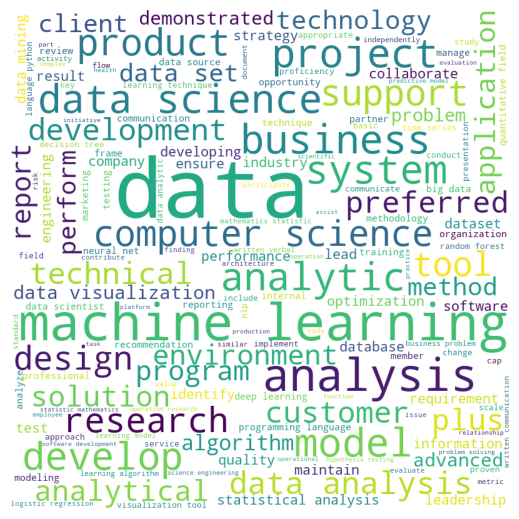

In [57]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt
import pandas as pd
 
wordcloud = WordCloud(width = 800, height = 800,
                background_color ='white',
                min_font_size = 10,random_state=101).generate(" ".join(df5['job_skills']))
 
# plot the WordCloud image                      
plt.figure(figsize = (5, 5), facecolor = None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad = 0)
 
plt.show()

In [58]:
vec= TfidfVectorizer(max_df=1.0, max_features=200000,min_df=0.2, stop_words='english',
                                 use_idf=True)
vec_matrix = vec.fit_transform(df5['job_skills'])
# vec_matrix = vec_matrix.toarray()

print ("In total, there are " + str(vec_matrix.shape[0]) + \
      " job postings and " + str(vec_matrix.shape[1]) + " terms.")

In total, there are 900 job postings and 79 terms.


In [59]:
# vec.get_feature_names()

In [60]:
from sklearn.decomposition import TruncatedSVD

In [61]:
tsvd = TruncatedSVD(n_components=68)
tsvd.fit(vec_matrix )
tsvd_mat = tsvd.transform(vec_matrix)

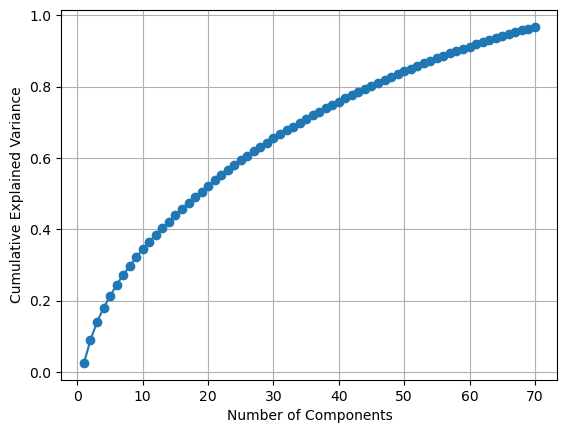

In [62]:
svd = TruncatedSVD(n_components=70)
svd.fit(vec_matrix)

# Calculate cumulative explained variance
explained_variance = np.cumsum(svd.explained_variance_ratio_)

# Plot cumulative explained variance
plt.plot(range(1,70 + 1), explained_variance, marker='o')
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance')
plt.grid()
plt.show()

In [63]:
# Set the desired explained variance threshold
desired_variance = 0.95

# Find the minimum number of components that achieve the desired variance
n_components = np.argmax(np.cumsum(svd.explained_variance_ratio_) >= desired_variance) + 1
n_components

67

In [64]:
tsvd_mat.shape

(900, 68)

In [65]:
from sklearn.cluster import KMeans

num_clusters = 3
km = KMeans(n_clusters=num_clusters,random_state=42)
km.fit(tsvd_mat)
clusters = km.labels_.tolist()

In [66]:
len(clusters)

900

In [67]:
df5['cluster_labels']=km.labels_

In [68]:
df5.head()

file_name                                          job_title  \
0  3848a1b91befde7e.html                        Scientist I, Bioinformatics   
1  05e113c6cfd125f5.html                 Quantitative Business Analyst, Geo   
2  9e40a4fde0c44f83.html  Project Associate (Data Analyst) - Integrated ...   
3  9f57934e7b0a76db.html                            Product Analyst, Growth   
4  7fdcfc6a40a67922.html                         Summer Intern - Biometrics   

                                          job_skills   cos_sim  cluster_labels  
0  integrate mine clinical research data evaluate...  0.641298               0  
1   data analysis visualization field data visual...  0.622638               2  
2  collect organize clean datasets source program...  0.596699               2  
3  build data modelr behavior marketing analytics...  0.581044               2  
4  interacts design clinical trial appropriate st...  0.578406               0

In [69]:
print ("Number of jobs included in each cluster:")
df5['cluster_labels'].value_counts().to_frame()

Number of jobs included in each cluster:


cluster_labels
2             318
0             306
1             276

In [70]:
km.cluster_centers_.shape

(3, 68)

In [71]:
# print ("<Document clustering result by K-means>")

# # km.cluster_centers_ denotes the importances of each items in centroid.
# # need to sort it in descending order and get the top k items.
# order_centroids = km.cluster_centers_.argsort()[:, ::-1] 

# Cluster_keywords_summary = {}
# for i in range(num_clusters):
#     print ("Cluster " + str(i) + " words:") 
#     Cluster_keywords_summary[i] = []
#     for ind in order_centroids[i, :271]: # get the top 20 words of each cluster
#         Cluster_keywords_summary[i].append(vec.get_feature_names()[ind])
#         print (vec.get_feature_names()[ind] + ", ")

#     cluster_jobs = df5[df5.cluster_labels == i]
#     print ("Cluster " + str(i) + " titles (" + str(len(cluster_jobs)) + " jobs): ") 
#     print()

In [72]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt
import pandas as pd

def wordcloud(i):
    wordcloud = WordCloud(width = 800, height = 800,
                background_color ='white',
                min_font_size = 10,random_state=101).generate(" ".join(df5[df5['cluster_labels']==i]['job_skills']))
    # plot the WordCloud image
    plt.figure(figsize = (5,5), facecolor = None,dpi=300)
    plt.imshow(wordcloud)
    plt.axis("off")
    plt.tight_layout(pad = 0)
    plt.show()

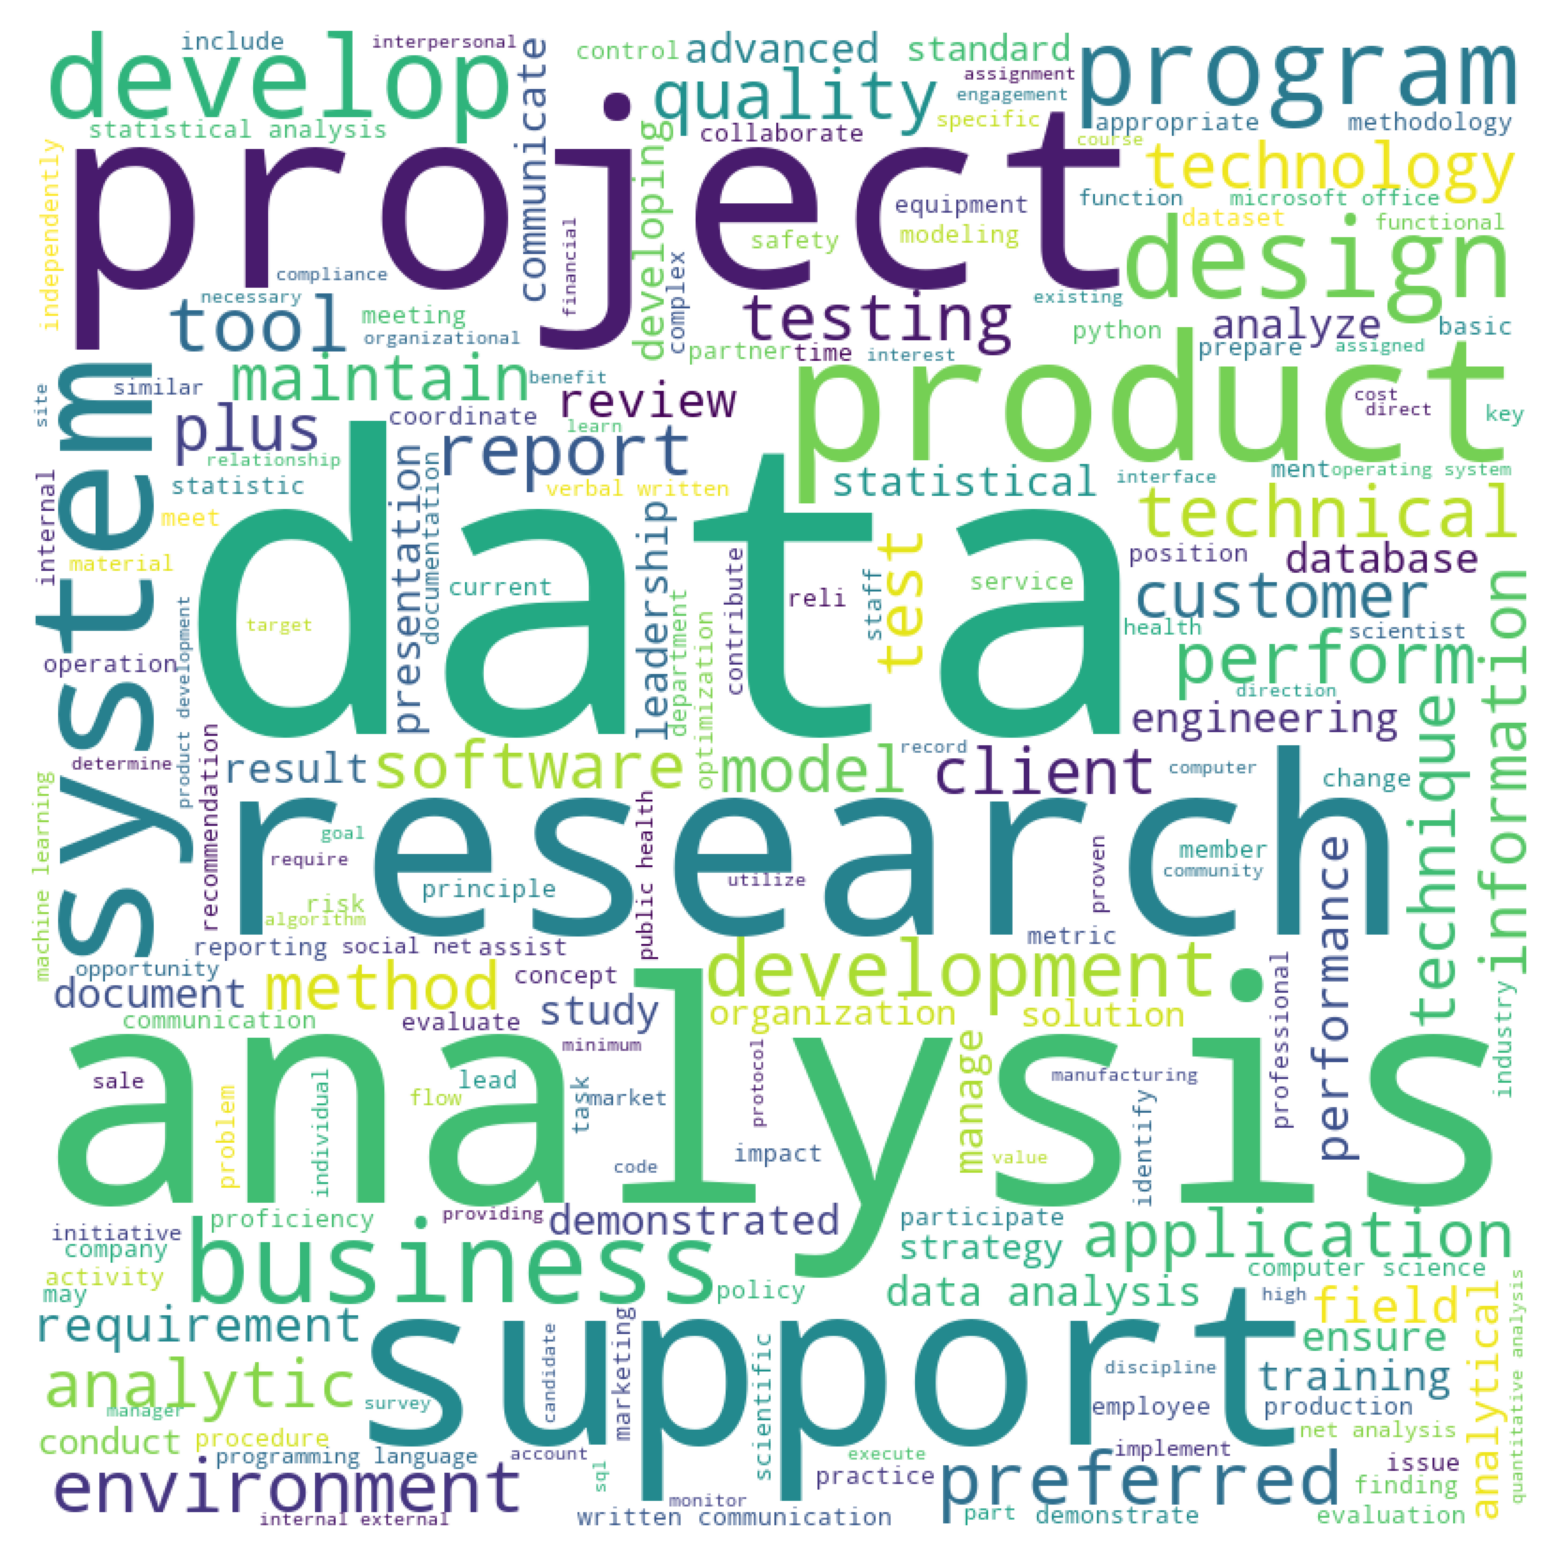

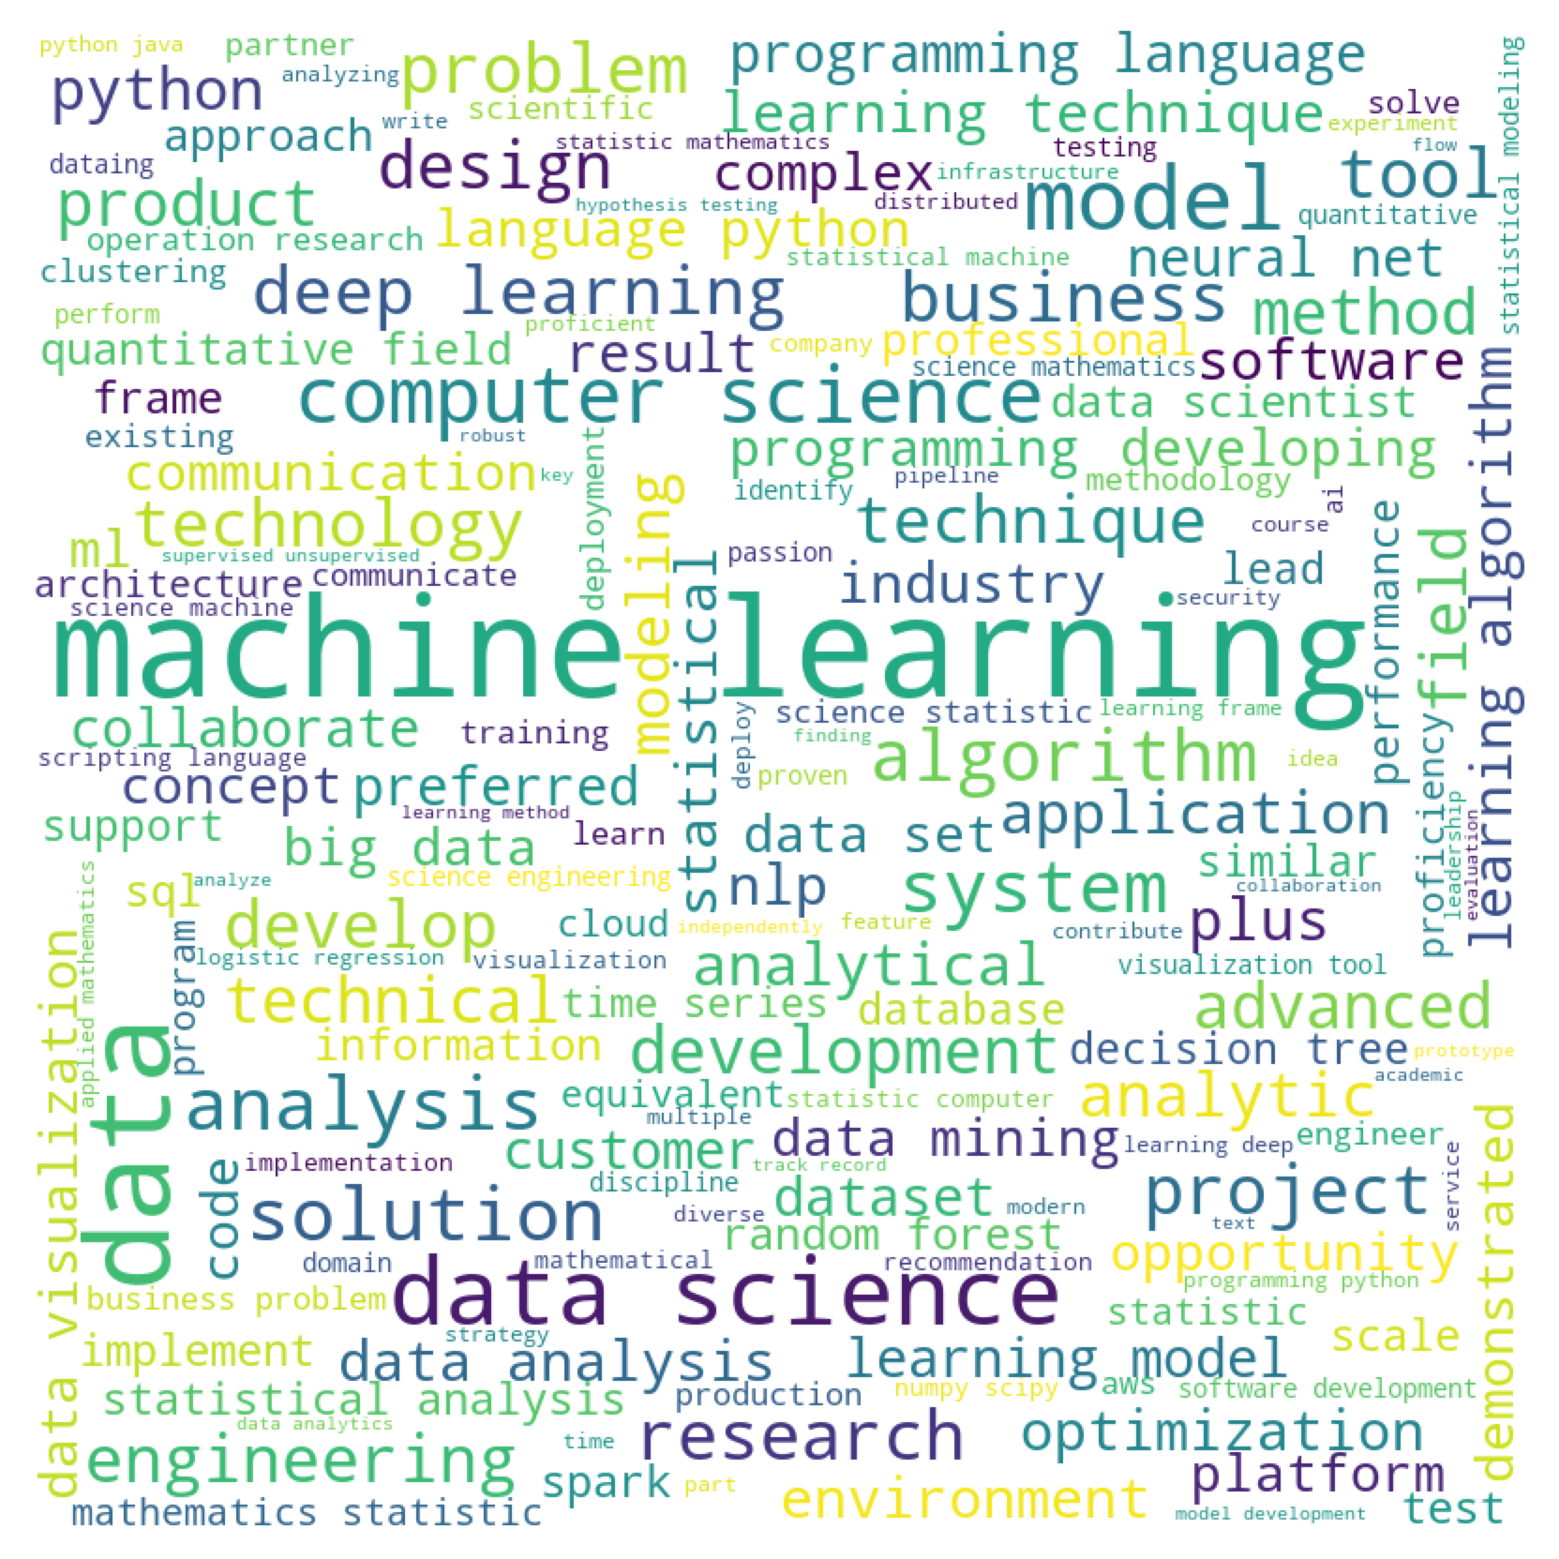

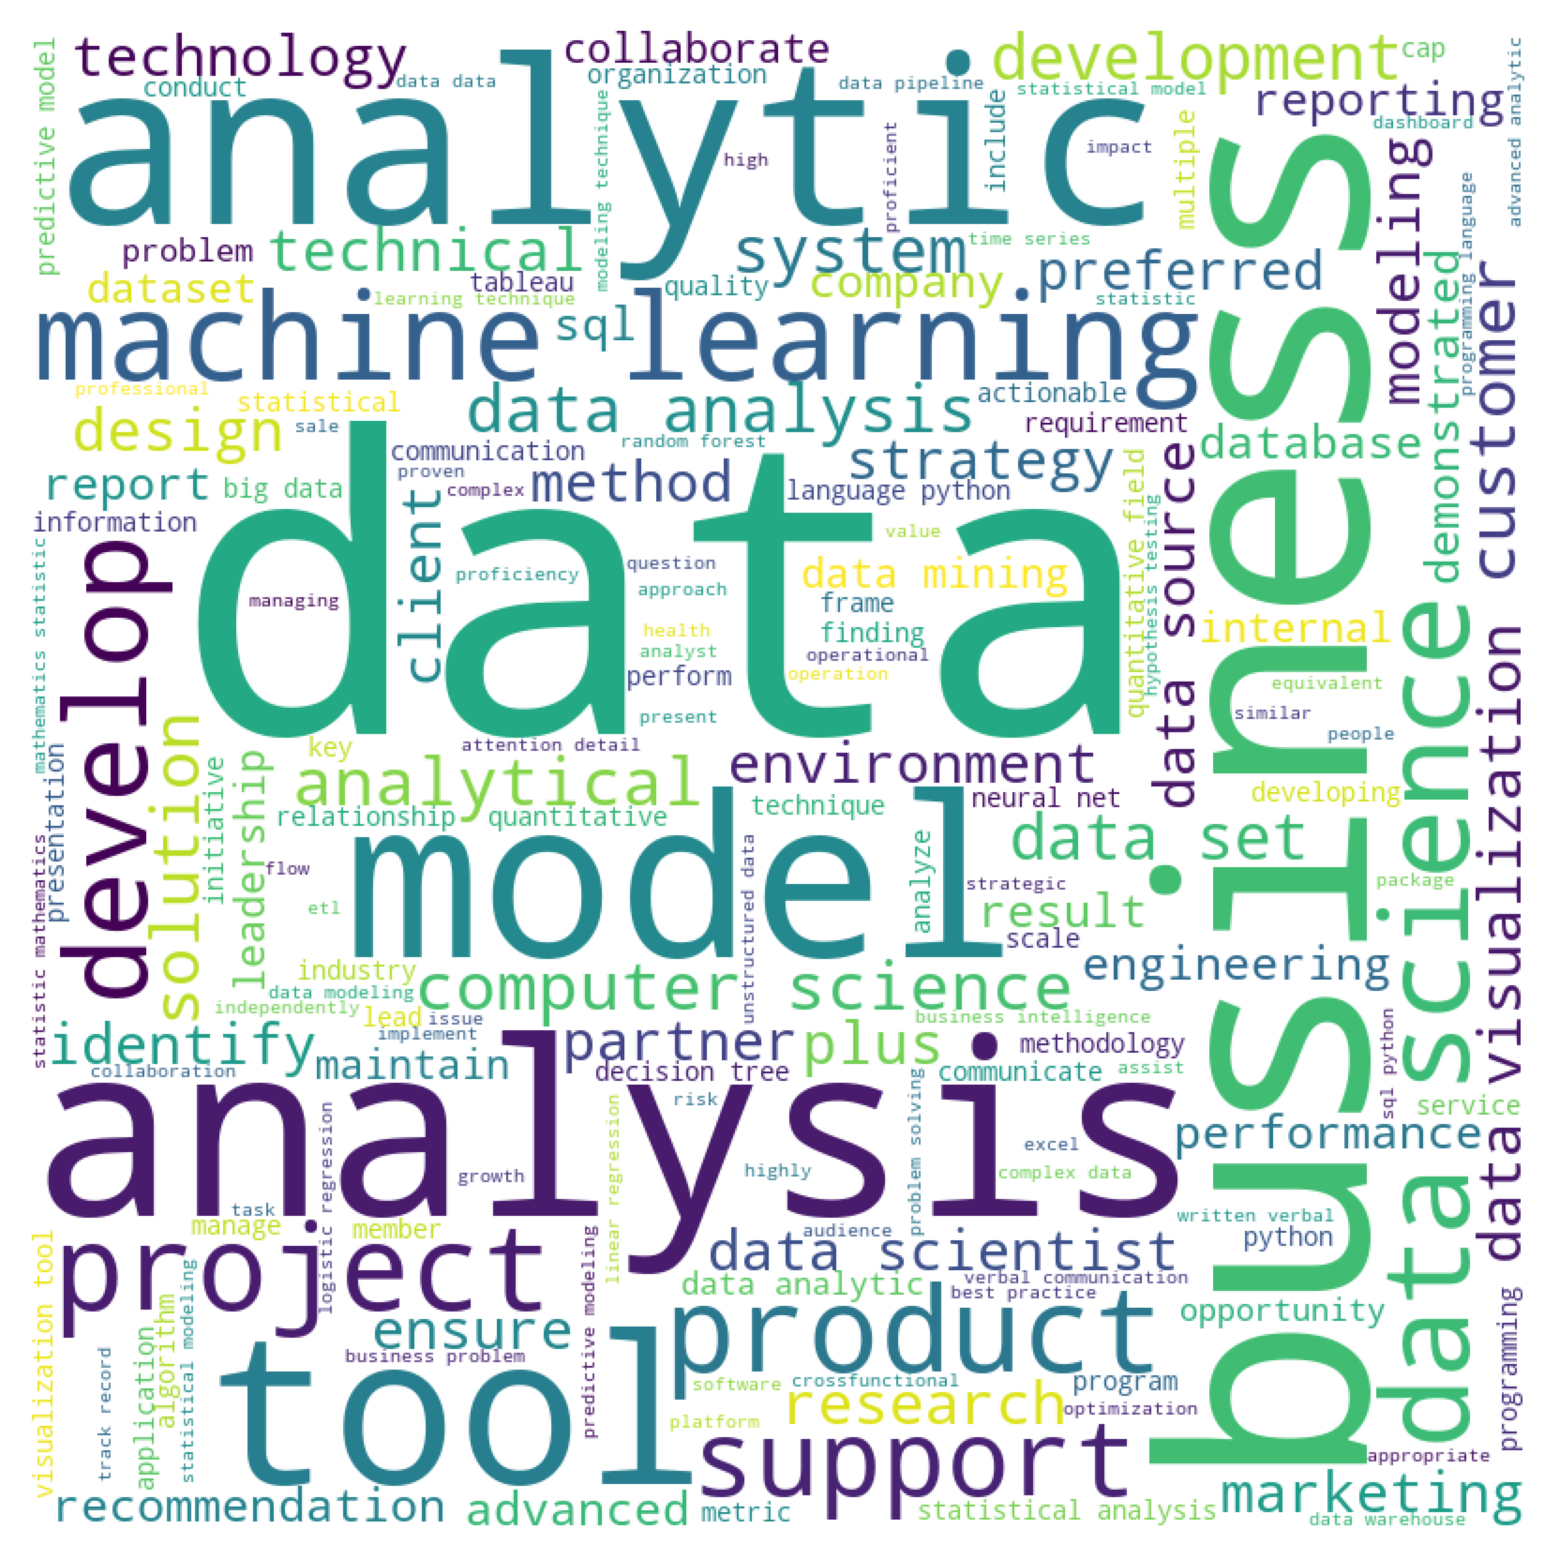

(None, None, None)

In [73]:
wordcloud(0),wordcloud(1),wordcloud(2)

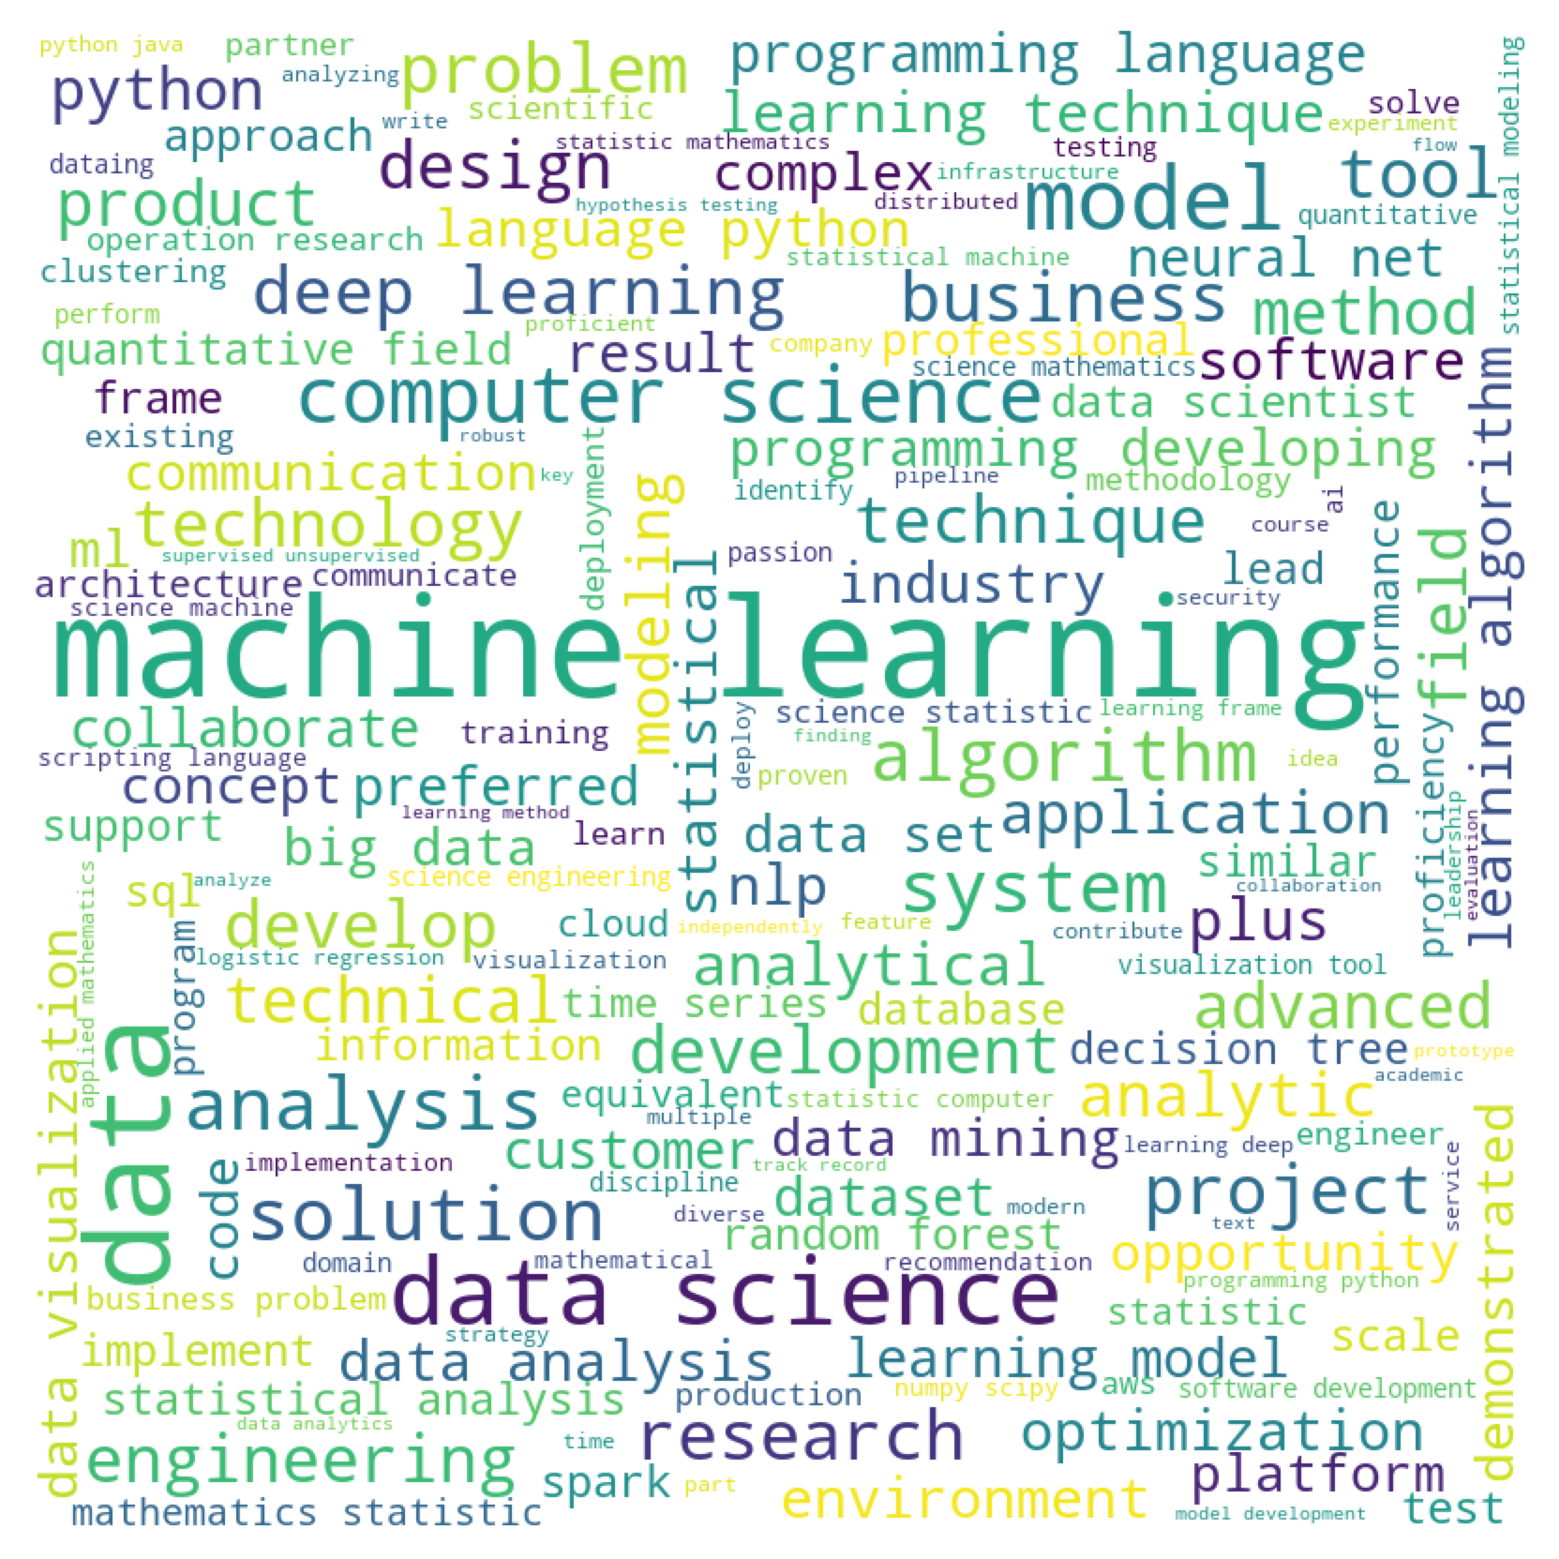

In [74]:
wordcloud(1)

In [75]:
lst_words="  ".join(df5[df5['cluster_labels']==1]['job_skills']).split()

In [79]:
from collections import Counter
cnt = Counter()
for text in df5[df5['cluster_labels']==1]['job_skills'].values:
    for word in text.split():
        cnt[word] += 1
cnt.most_common(271)

[('data', 1329),
 ('learning', 889),
 ('machine', 696),
 ('science', 528),
 ('analysis', 429),
 ('model', 413),
 ('python', 325),
 ('statistical', 309),
 ('algorithm', 276),
 ('engineering', 269),
 ('technique', 257),
 ('statistic', 255),
 ('computer', 245),
 ('problem', 244),
 ('business', 239),
 ('tool', 222),
 ('programming', 208),
 ('system', 203),
 ('language', 202),
 ('development', 202),
 ('modeling', 194),
 ('deep', 193),
 ('solution', 189),
 ('field', 188),
 ('project', 181),
 ('research', 175),
 ('method', 169),
 ('design', 167),
 ('sql', 160),
 ('software', 156),
 ('environment', 156),
 ('analytics', 156),
 ('technical', 152),
 ('product', 151),
 ('communication', 143),
 ('advanced', 141),
 ('mathematics', 135),
 ('regression', 131),
 ('visualization', 128),
 ('technology', 125),
 ('develop', 122),
 ('quantitative', 121),
 ('net', 119),
 ('complex', 110),
 ('analytical', 109),
 ('frame', 107),
 ('database', 106),
 ('spark', 105),
 ('testing', 104),
 ('ml', 104),
 ('applicati